# Rockets notebook - more efficient and clean

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import time

# model imports
from sklearn import model_selection
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, log_loss
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
from scipy.stats import skew
from sklearn.preprocessing import PolynomialFeatures

sns.set_style('white')
import random

%matplotlib inline

random.seed(12345)
seed = 12345  # for seeding individually

pd.options.display.max_columns = 100  # max columns to display

In [23]:
# models to enumerate
model_list = [ExtraTreesClassifier(),
RandomForestClassifier(),
GradientBoostingClassifier(),
XGBClassifier()]

In [2]:
def get_classifier_name(classifier):
    return str(classifier).split('(')[0]

# so that: 
# get_classifier_name(model_list[0])  -> 'DecisionTreeClassifier'


In [81]:
def process_data(train_data, has_labels=True):
    
    if has_labels:
        target = train_data.loc[:,'class']

    # parsing features and turnng them into vectors:
    qq = list(range(1, 211, 7))
    t_mat = train_data.iloc[:,qq].as_matrix()
    qq = list(range(2, 211, 7))
    x_mat = train_data.iloc[:,qq].as_matrix()
    qq = list(range(3, 211, 7))
    y_mat = train_data.iloc[:,qq].as_matrix()
    qq = list(range(4, 211, 7))
    z_mat = train_data.iloc[:,qq].as_matrix()
    qq = list(range(5, 211, 7))
    vx_mat = train_data.iloc[:,qq].as_matrix()
    qq = list(range(6, 211, 7))
    vy_mat = train_data.iloc[:,qq].as_matrix()
    qq = list(range(7, 211, 7))
    vz_mat = train_data.iloc[:,qq].as_matrix()

    # 3 matrices:
    ax_mat = np.gradient(vx_mat,0.5,axis=1)
    ay_mat = np.gradient(vy_mat,0.5,axis=1)
    az_mat = np.gradient(vz_mat,0.5,axis=1)
    
    v_total = np.sqrt(np.power(vx_mat,2)+np.power(vy_mat,2)+np.power(vz_mat,2))
    a_total = np.sqrt(np.power(ax_mat,2)+np.power(ay_mat,2)+np.power(az_mat,2))
    # aa_total = np.sqrt(np.power(aax_mat,2)+np.power(aay_mat,2)+np.power(aaz_mat,2))
    # t_len = len(t_mat[~np.isnan(t_mat)])
    t_len = np.sum(~np.isnan(t_mat),axis=1)
    vx_mean = np.nanmean(vx_mat,axis=1)
    vy_mean = np.nanmean(vy_mat,axis=1)
    vz_mean = np.nanmean(vz_mat,axis=1)
    v_mean = np.nanmean(v_total,axis=1)
    ax_mean = np.nanmean(ax_mat,axis=1)
    ay_mean = np.nanmean(ay_mat,axis=1)
    az_mean = np.nanmean(az_mat,axis=1)
    a_total_mean = np.nanmean(a_total,axis=1)
    # aax_mean = np.nanmean(aax_mat,axis=1)
    # 
    # aay_mean = np.nanmean(aay_mat,axis=1)
    # 
    # aaz_mean = np.nanmean(aaz_mat,axis=1)
    # 
    # aa_total_mean = np.nanmean(aa_total,axis=1)
    # 
    # 
    # aax_std = np.nanstd(aax_mat,axis=1)
    # 
    # aay_std = np.nanstd(aay_mat,axis=1)
    # 
    # aaz_std = np.nanstd(aaz_mat,axis=1)
    # 
    # aa_total_std = np.nanstd(aa_total,axis=1)
    x_mean = np.nanmean(x_mat,axis=1)
    y_mean = np.nanmean(y_mat,axis=1)
    z_mean = np.nanmean(z_mat,axis=1)
    x_std = np.nanstd(x_mat,axis=1)
    y_std = np.nanstd(y_mat,axis=1)
    z_std = np.nanstd(z_mat,axis=1)
    vx_std = np.nanstd(vx_mat,axis=1)
    vy_std = np.nanstd(vy_mat,axis=1)
    vz_std = np.nanstd(vz_mat,axis=1)
    v_std = np.nanstd(v_total,axis=1)
    vx_skew = skew(vx_mat, axis=1, bias=True, nan_policy='omit')
    vy_skew = skew(vy_mat, axis=1, bias=True, nan_policy='omit')
    vz_skew = skew(vz_mat, axis=1, bias=True, nan_policy='omit')
    v_total_skew = skew(v_total, axis=1, bias=True, nan_policy='omit')
    vx_max = np.nanmax(vx_mat,axis=1)
    vy_max = np.nanmax(vy_mat,axis=1)
    vz_max = np.nanmax(vz_mat,axis=1)
    v_max = np.nanmax(v_total,axis=1)
    vx_min = np.nanmin(vx_mat,axis=1)
    vy_min = np.nanmin(vy_mat,axis=1)
    vz_min = np.nanmin(vz_mat,axis=1)
    v_min = np.nanmin(v_total,axis=1)
    vy_range = vy_max-vy_min
    ax_std = np.nanstd(ax_mat,axis=1)
    ay_std = np.nanstd(ay_mat,axis=1)
    az_std = np.nanstd(az_mat,axis=1)
    a_total_std = np.nanstd(a_total,axis=1)
    ax_skew = skew(ax_mat, axis=1, bias=True, nan_policy='omit')
    ay_skew = skew(ay_mat, axis=1, bias=True, nan_policy='omit')
    az_skew = skew(az_mat, axis=1, bias=True, nan_policy='omit')
    a_total_skew = skew(a_total, axis=1, bias=True, nan_policy='omit')
    N_data = len(train_data)
    notnan = ~np.isnan(x_mat)
    p=np.zeros((N_data, 3))
    roots = np.zeros((N_data, 2))
    std_poly = np.zeros(N_data)
    for i in range(N_data):
        p[i,:] = np.polyfit(x_mat[i,notnan[i,:]], z_mat[i,notnan[i,:]],2)
        roots[i]=np.roots(p[i])
        std_poly[i] = np.std(np.polyval(p[i], x_mat[i,notnan[i,:]]))


    poly_range = np.abs(roots[:,1]-roots[:,0])
    drag = np.power(v_mean,2)
    drag_density = np.power(v_mean,2)/z_mean
    poly_c0 = p[:,0]
    poly_c1 = p[:,1]
    poly_c2 = p[:,2]
    poly_maxz = poly_c2-np.power(poly_c1,2)/float(4)/poly_c0
    t_maxz = z_mean+0.5*np.power(vz_mean,2)/9.8
    maxz_times_range = poly_maxz*poly_range
    t_maxz_times_v_mean = t_maxz*v_mean
    slope_std = np.std(poly_c1)
    slope_mean = np.mean(poly_c1)
    slope_class = np.zeros_like(poly_c1)
    slope_class[poly_c1<slope_mean - slope_std] = -1
    slope_class[poly_c1>slope_mean + slope_std] = 1
    new_feat = pd.DataFrame({'x_mean':x_mean,'z_mean': z_mean, 'x_std':x_std,'z_std': z_std, 
                             'vx_mean': vx_mean, 'vy_mean': vy_mean, 'vz_mean': vz_mean, 'v_mean': v_mean,
                             'vx_std': vx_std, 'vy_std': vy_std, 'vz_std': vz_std, 'v_std': v_std,
                             'vx_skew': vx_skew, 'vy_skew': vy_skew, 'vz_skew': vz_skew, 'v_total_skew': v_total_skew,
                             'vy_range': vy_range, 'ax_mean':ax_mean,'ay_mean':ay_mean, 
                             'az_mean':az_mean,'a_total_mean':a_total_mean, 
                             'ax_std':ax_std,'ay_std':ay_std,'az_std':az_std,'a_total_std':a_total_std,
                             'ax_skew': ax_skew, 'ay_skew': vy_skew, 'az_skew': vz_skew, 'a_total_skew': a_total_skew,
                             'poly_c0':poly_c0,'poly_c1':poly_c1,'poly_c2':poly_c2,
                             'poly_range':poly_range,'poly_maxz':poly_maxz,
                             'maxz_times_range':maxz_times_range,'t_maxz_times_v_mean':t_maxz_times_v_mean,'std_poly':std_poly,
                             'slope_class':slope_class, 'drag_density':drag_density, 'drag':drag,'t_len':t_len})  
    # 'class':target}))  # 'class':target})
    # new_feat = pd.DataFrame(return_dict)
    
    # get first 5 seconds
    qq = list(range(1,71))
    X_raw = train_data.iloc[:,qq]
    
    #     X_new = new_feat.drop('class',axis=1)

    # X = X_raw.join(X_new)  # Not using RAW at all
    X = new_feat
    if has_labels:
        y = target
        
        # then split to train test
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)
        
        return X_train, X_val, y_train, y_val
    else:
        return X



In [6]:
# DATA LOADING - change work_folder to your folder
work_folder = r'E:\DataHack_2017'  # 
folder_join = os.path.join
test_sample = folder_join(work_folder, 'test.csv')
train_sample = folder_join(work_folder, 'train.csv')

In [74]:
# saving two least common classes for later, for 'other' classification
data_with23_16 = pd.read_csv(train_sample)
# data_no23_16 = data_with23_16[~data_with23_16['class'].isin([23,16])]  # removed 2 classes as other
# train_data, test_data = train_test_split(data_no23_16,test_size=0.2,random_state=123)  
train_data = data_with23_16

# TODO: remember 23,16

In [60]:
def model_enumeration(X, y, model_list, scoring_list):
    print("Running model enumeration:")
    st_st_time = time.time()  # timing
    
    for model in model_list:
        name = get_classifier_name(model)  # the name of the model 
        st_time = time.time()
        print(f"Working on model {name}")
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        for scoring_type in scoring_list:
            result = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring_type, n_jobs=-1)
            print(f"{name}: {scoring_type}: {result.mean():2.2f}, ({result.std():2.2f})")
        print(f"{name} took {time.time() - st_time:2.2f}")

    print(f"The run took {time.time() - st_st_time:2.2f}")

In [109]:
# if that's the training set:
X_train, X_val, y_train, y_val = process_data(train_data)

# if that's the real set
# X_test = process_data(test_data, has_labels=False)

In [111]:
print(y_val.shape, X_val_poly_df.shape)
print(y_train.shape, X_train_poly_df.shape)

(5750,) (5750, 903)
(22996,) (22996, 903)


In [96]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)

In [119]:
# X_train_poly_df = pd.DataFrame(X_train_poly)
# X_train_poly_df.to_csv(folder_join(work_folder, 'train_poly.csv'))
# X_val_poly_df = pd.DataFrame(X_val_poly)
# X_val_poly_df.to_csv(folder_join(work_folder, 'train_val_poly.csv'))

# y_train_poly_df = pd.DataFrame(X_train_poly)
y_train.to_csv(folder_join(work_folder, 'y_train.csv'), index=False, header="y")
# y_val_poly_df = pd.DataFrame(y_val)
y_val.to_csv(folder_join(work_folder, 'y_val.csv'), index=False, header="y")


In [122]:
real_test_data = pd.read_csv(test_sample)
X_test = process_data(real_test_data, has_labels=False)
poly = PolynomialFeatures(2)
X_test_poly = poly.fit_transform(X_test)
X_test_poly_df = pd.DataFrame(X_test_poly)
X_test_poly_df.to_csv(folder_join(work_folder, 'test_poly.csv'))

In [118]:
y_train.shape
# y_val.shape
# X_val_poly.shape
# X_train.shape

(22996,)

In [9]:
# run model enumeration
scoring_list = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
# model_enumeration(X_train, y_train, model_list, scoring_list)

In [ ]:
clf = MLPClassifier(random_state=1)
clf.fit(X, y)     

In [64]:
model_enumeration(X_train, y_train, [MLPClassifier()], ['f1_weighted'])

Running model enumeration:
Working on model MLPClassifier
MLPClassifier: f1_weighted: 0.01, (0.00)
MLPClassifier took 23.61
The run took 23.61


In [41]:
# Parameter optimization
# TODO: grid
# on randomForest and ExtraTrees
param_grid = {'n_estimators': [5, 10, 15, 20, 30, 50, 80, 100],
              'max_depth': [2, 5, 7, 8, 9, 12, 14],
             }

st_time = time.time()
# for clf in (RandomForestClassifier(n_jobs=-1)
clf = RandomForestClassifier(n_jobs=-1)
print(f"Working on model {clf}")
grid_clf = model_selection.GridSearchCV(clf, param_grid, scoring='accuracy', cv=10)
# grid_clf = model_XGBClassifier(objective='multi:softprob',learning_rate=0.2,
#                     subsample=0.7,
#                     colsample_bytree=0.9,
#                     colsample_bylevel=0.7,
#                     max_depth=8,
#                     nthread=4,
#                     n_estimators=100,
#                     seed=1234))selection.GridSearchCV(clf, param_grid, scoring='f1_weighted', cv=10)
grid_clf.fit(X_train, y_train)
# print(f"{clf}: {scoring_type}: {result.mean():2.2f}, ({result.std():2.2f})")


Working on model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 30, 50, 80, 100], 'max_depth': [2, 5, 7, 8, 9, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [45]:
# for random tree:
print(f"best params: {grid_clf.best_params_}")
print(f"Best score: {grid_clf.best_score_:2.2f}")

best params: {'max_depth': 14, 'n_estimators': 100}
Best score: 0.61


In [51]:
param_grid_xgboost = {'learning_rate': [0.2/3, 0.2, 0.6, 0.9, 1.5], 
                      'max_depth': list(range(5,16)),
                      'n_estimators': [50, 100, 150, 200]}
st_time = time.time()
# clf = RandomForestClassifier(n_jobs=-1)
name = get_classifier_name(model)  # the name of the model
print(f"Working on model {name}")
# grid_clf = model_selection.GridSearchCV(clf, param_grid, scoring='accuracy', cv=10)
xg_clf = XGBClassifier(objective='multi:softprob',
                    subsample=0.7,
                    colsample_bytree=0.9,
                    colsample_bylevel=0.7,
                    nthread=4,
                    seed=seed)
grid_xg_clf = model_selection.GridSearchCV(xg_clf, param_grid_xgboost, scoring='f1_weighted', cv=10)
grid_xg_clf.fit(X_train, y_train)

Working on model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


KeyboardInterrupt: 

In [20]:
def run_PCA_on_data(data, n_comp=2):
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(data)
    print(pca.explained_variance_ratio_)
    return X_pca

In [13]:
def run_tSNE_on_data(data, n_comp=2, init='random'):
    X_embedded = TSNE(n_components=n_comp, init=init).fit_transform(data)
    return X_embedded


In [18]:
X_train.head()

,a_total_mean,a_total_std,ax_mean,ax_std,az_mean,az_std,maxz_times_range,poly_c0,poly_c1,poly_c2,poly_maxz,poly_range,slope_class,std_poly,t_maxz_times_v_mean,v_max,v_mean,v_min,v_std,vx_max,vx_mean,vx_min,vx_std,vy_max,vy_min,vz_max,vz_mean,vz_min,vz_std,x_mean,x_std,y_mean,y_std,z_mean,z_std
21581,10.194870,3.244392,-3.598239,2.704555,-7.236991,4.396100,1.643011e+08,-0.000047,-0.476941,5640.782840,6840.044929,24020.465124,0.0,897.138624,2.655242e+06,405.650758,393.295745,385.189411,5.099240,348.388766,323.639763,299.447488,14.896868,6.608609,-4.561478,-169.716815,-221.024066,-267.830742,29.706542,2232.658561,1304.801194,-1.811264,3.309128,4258.828930,897.149617
8553,16.719907,4.137250,-8.278905,3.730294,-13.888284,3.873759,1.176367e+08,-0.000020,0.543845,452.592780,4117.388949,28570.710117,0.0,463.321702,2.087201e+06,573.734143,530.209660,484.920945,29.671667,504.283802,477.529756,449.301459,18.983225,2.646320,-5.957146,274.414720,229.657209,179.841107,29.262686,1585.891964,962.993290,-0.325161,3.179477,1245.616741,463.323287
12436,11.665336,3.953027,-1.803185,4.840565,-9.818985,4.280947,1.598832e+08,-0.000065,0.199738,7317.155209,7470.064026,21403.194892,0.0,43.016911,2.045021e+06,288.103270,275.255789,264.027933,7.178048,284.705049,273.679760,262.530317,6.268638,3.861337,-4.019981,57.004513,7.585401,-39.179596,28.551047,1310.212083,785.920276,-0.936135,2.922572,7426.592815,43.172138
8054,13.757349,5.082235,-1.517332,4.714353,-11.533013,5.804930,4.689379e+08,-0.000040,0.608627,10684.735991,13001.328601,36068.456395,0.0,595.202798,4.903312e+06,421.775897,379.561985,345.287785,21.575738,360.414421,348.330220,336.527382,6.432758,7.709833,-4.485552,224.324796,146.269160,74.161264,41.866209,2378.127084,1408.182041,-1.210838,2.741021,11826.777527,595.211630
26522,11.540724,5.607314,-5.321076,4.662217,-7.574481,6.443180,1.512123e+08,-0.000063,-0.387540,6504.374963,7103.228697,21287.826804,0.0,609.493247,2.301402e+06,336.105799,327.999984,320.897491,4.379242,310.926311,280.135795,249.172641,17.867911,6.361671,-6.092755,-122.026249,-168.000927,-207.593760,23.920085,1739.649950,1010.229587,-0.768471,4.508292,5576.455306,609.509042


In [47]:
from sklearn.preprocessing import scale
scaled_X_train = scale(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [49]:
scaled_X_train[:10]

array([[ -3.25837575e-01,  -2.25110857e-01,  -1.27156696e-01,
         -2.91147179e-01,   2.07125915e-01,  -1.63831494e-01,
         -5.62047689e-01,   1.64275537e-01,  -6.66864240e-01,
         -4.65170649e-01,  -6.60948716e-01,  -6.13519744e-01,
          2.67919992e-02,   6.32923340e-01,  -5.84691370e-01,
         -3.98107048e-01,  -3.37130770e-01,  -1.94630341e-01,
         -4.88661663e-01,  -2.87685309e-01,  -3.46325948e-01,
         -3.72238733e-01,   7.73498122e-02,   7.29179032e-01,
          6.37970800e-01,  -7.92527025e-01,  -8.51338371e-01,
         -8.99974602e-01,  -2.68448538e-02,   4.79698272e-01,
          4.29237106e-01,  -1.50600155e+00,   8.32212662e-01,
         -6.92276936e-01,   6.32918263e-01],
       [  1.18107276e-01,  -1.68690802e-01,  -6.08393686e-01,
         -2.18936411e-01,  -6.04439562e-01,  -2.03085037e-01,
         -6.24904159e-01,   6.13273704e-01,   6.71808380e-01,
         -1.24286465e+00,  -9.92247752e-01,  -3.95170243e-01,
          2.67919992e-02,

In [21]:
# Also, run PCA
X_pca = run_PCA_on_data(X_train, n_comp=15)

# no PCA
# X_tSNE = run_tSNE_on_data(X_train)
# start with PCA
# X_tSNE = run_tSNE_on_data(X_train, n_comp=2, init='pca')

# tODO: run in classifier

[  9.99992636e-01   7.36345971e-06   2.04415062e-10   1.16476118e-10
   3.98861235e-12   1.39421349e-12   1.09087101e-12   1.34669548e-13
   2.70969867e-14   1.64178415e-14   8.14758625e-15   1.66794559e-15
   8.60164731e-16   5.64210070e-16   5.25211873e-16]


In [52]:
def plot_PCA(X_pca):
    """Plot PCA figure."""
    plt.figure(figsize=(15, 7))
    p1 = [x[0] for x in X_pca]
    p2 = [x[1] for x in X_pca]

    colors = [int(i % 500) for i in y_train]
    plt.scatter(p1, p2, c=colors, s=3)
    sns.despine()

In [50]:
pca = PCA(n_components=15)
# X_pca = pca.fit_transform(X_train)
X_pca = pca.fit_transform(scaled_X_train)
print(pca.explained_variance_ratio_)

[ 0.34809166  0.16587746  0.12027352  0.0920406   0.05926398  0.04419441
  0.02759095  0.02595483  0.02235546  0.01958763  0.01768778  0.01511003
  0.01158096  0.00849703  0.00690259]


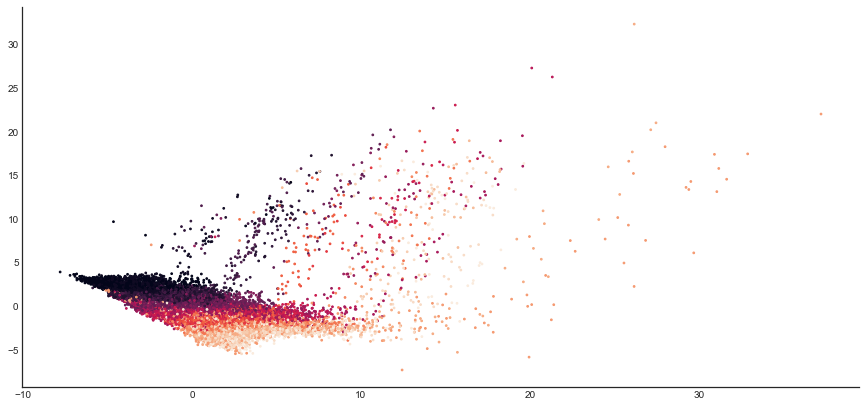

In [53]:
plot_PCA(X_pca)

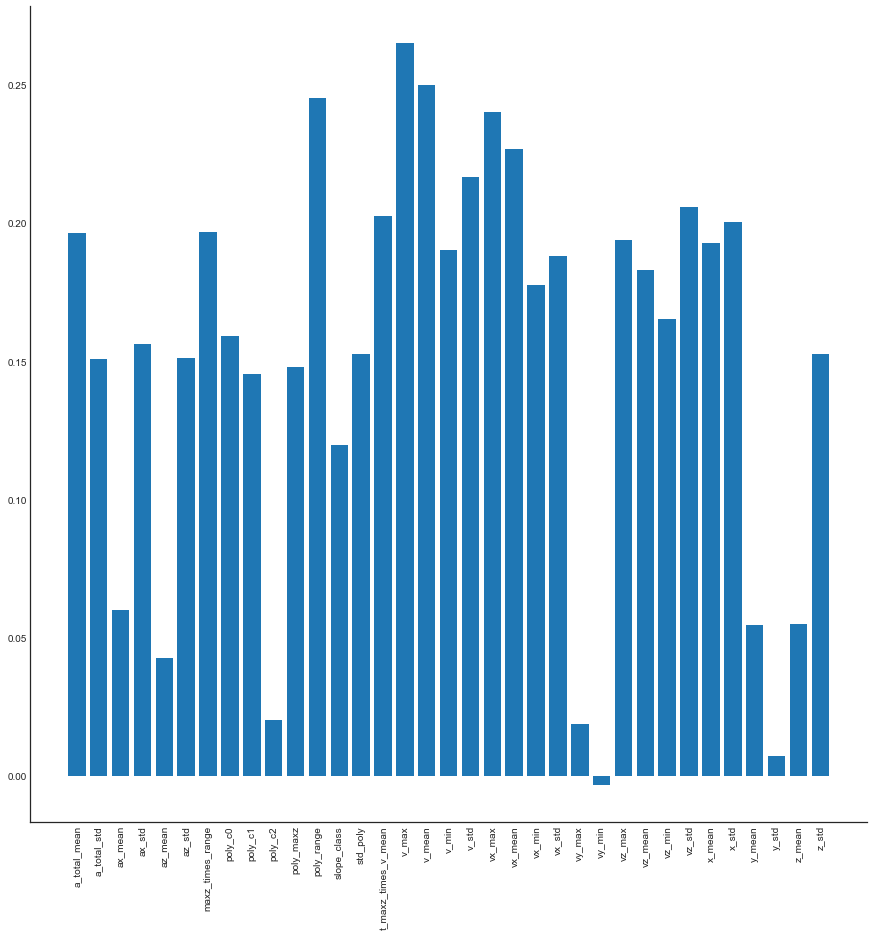

In [56]:
plt.figure(figsize=(15,15))
# print(X_train.columns)
plt.bar(range(len(pca.components_[0])), pca.components_[0])
plt.xticks(range(len(X_train.columns)), list(X_train.columns), rotation='vertical')

sns.despine();

In [123]:
# grid_clf = XGBClassifier(objective='multi:softprob',learning_rate=0.1,
#                          subsample=0.7,
#                          colsample_bytree=0.9,
#                          colsample_bylevel=0.7,
#                          max_depth=8,
#                          n_estimators=150,
#                          seed=12345)
# # grid_clf.fit(X_train, y_train)
# grid_clf.fit(X_train_poly, y_train)

In [131]:
pca = PCA(n_components=15)
# X_pca = pca.fit_transform(X_train)
X_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[  9.99992605e-01   7.37103238e-06   2.42234878e-08   1.58198226e-10
   1.61906894e-11   3.95693691e-12   1.23999450e-12   1.01696926e-12
   1.32733896e-13   1.03824398e-14   3.06467965e-15   2.71164781e-15
   9.85527713e-16   5.95704906e-16   3.98054233e-16]


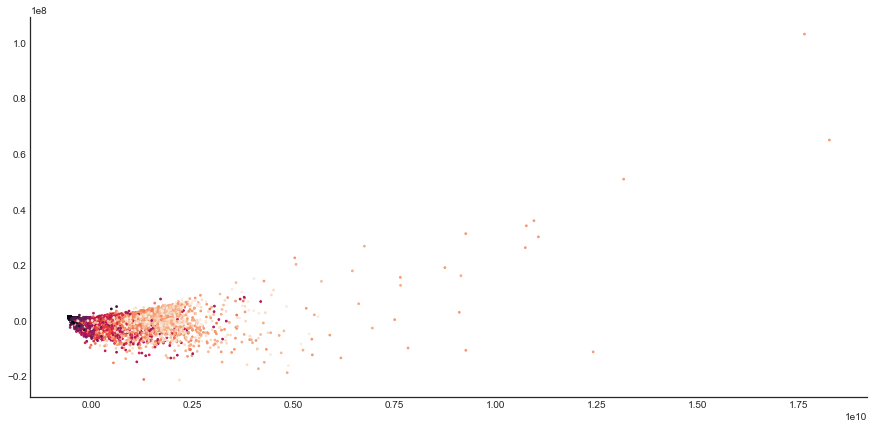

In [133]:
plt.figure(figsize=(15, 7))
p1 = [x[0] for x in X_pca]
p2 = [x[1] for x in X_pca]

colors = [int(i % 500) for i in y_train]
plt.scatter(p1, p2, c=colors, s=3)
# plt.xlim(-0.01e20,0.5e20)
sns.despine()

In [ ]:
grid_clf

In [ ]:
# gbc = XGBClassifier(objective='multi:softprob',
#                     learning_rate=0.2,
#                     subsample=0.7,
#                     colsample_bytree=0.9,
#                     colsample_bylevel=0.7,
#                     max_depth=8,
#                     nthread=4,
#                     n_estimators=100,
#                     seed=1234)